About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train.csv')

In [ ]:
news_dataset.shape

(20800, 5)

In [ ]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [ ]:

nltk.download('porter_test') # download required resources

from nltk.stem import PorterStemmer # import PorterStemmer from nltk.stem

port_stem = PorterStemmer()

[nltk_data] Downloading package porter_test to /root/nltk_data...
[nltk_data]   Unzipping stemmers/porter_test.zip.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the required nltk resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatization(content):
    lemmatizer = WordNetLemmatizer()

    # Remove non-alphabetical characters
    lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)

    # Convert to lowercase
    lemmatized_content = lemmatized_content.lower()

    # Split into words
    lemmatized_content = lemmatized_content.split()

    # Lemmatize and remove stopwords
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if word not in stopwords.words('english')]

    # Join the words back into a single string
    lemmatized_content = ' '.join(lemmatized_content)

    return lemmatized_content


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
news_dataset['content'] = news_dataset['content'].apply(lemmatization)

In [ ]:
print(news_dataset['content'])

0        darrell lucus house dem aide even see comey le...
1        daniel j flynn flynn hillary clinton big woman...
2                 consortiumnews com truth might get fired
3        jessica purkiss civilian killed single u airst...
4        howard portnoy iranian woman jailed fictional ...
                               ...                        
20795    jerome hudson rapper trump poster child white ...
20796    benjamin hoffman n f l playoff schedule matchu...
20797    michael j de la merced rachel abrams macy said...
20798    alex ansary nato russia hold parallel exercise...
20799                           david swanson keep f alive
Name: content, Length: 20800, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

['darrell lucus house dem aide even see comey letter jason chaffetz tweeted'
 'daniel j flynn flynn hillary clinton big woman campus breitbart'
 'consortiumnews com truth might get fired' ...
 'michael j de la merced rachel abrams macy said receive takeover approach hudson bay new york time'
 'alex ansary nato russia hold parallel exercise balkan'
 'david swanson keep f alive']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 19361)	0.3898334584250517
  (0, 16636)	0.2434231886663421
  (0, 11060)	0.33838114561245775
  (0, 10711)	0.27186640212962043
  (0, 9676)	0.23066376406357905
  (0, 8757)	0.20553409740940168
  (0, 6290)	0.25787634753604916
  (0, 4706)	0.2800374370965301
  (0, 4440)	0.3349354477607908
  (0, 3567)	0.22972642932451354
  (0, 2995)	0.34215548056905637
  (0, 372)	0.27922090210909
  (1, 20677)	0.26478675287110587
  (1, 8539)	0.19378614861132634
  (1, 7016)	0.7267818541909519
  (1, 4403)	0.2693959928557533
  (1, 3384)	0.19427423170952499
  (1, 2694)	0.37335881776986113
  (1, 2311)	0.15792547179062305
  (1, 1843)	0.299113859607448
  (2, 19276)	0.397654988300042
  (2, 11859)	0.4717261145949637
  (2, 7568)	0.3412820420603414
  (2, 6879)	0.4651214075065619
  (2, 3800)	0.44062273209258024
  :	:
  (20797, 16242)	0.24487074231338238
  (20797, 15189)	0.312690799166471
  (20797, 14928)	0.24487074231338238
  (20797, 12644)	0.07928577958094714
  (20797, 11824)	0.17217557527896182
  (20797, 11751)	0.29

Splitting the dataset to training & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)

Training the Model: Logistic Regression

In [ ]:
model = LogisticRegression()  # Adjust C for regularization

# Performing k-fold cross-validation
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(model, X, Y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.97596154 0.97355769 0.97980769 0.97475962 0.97596154]
Mean CV Score: 0.9760096153846154


Class distribution:
 label
1    10413
0    10387
Name: count, dtype: int64


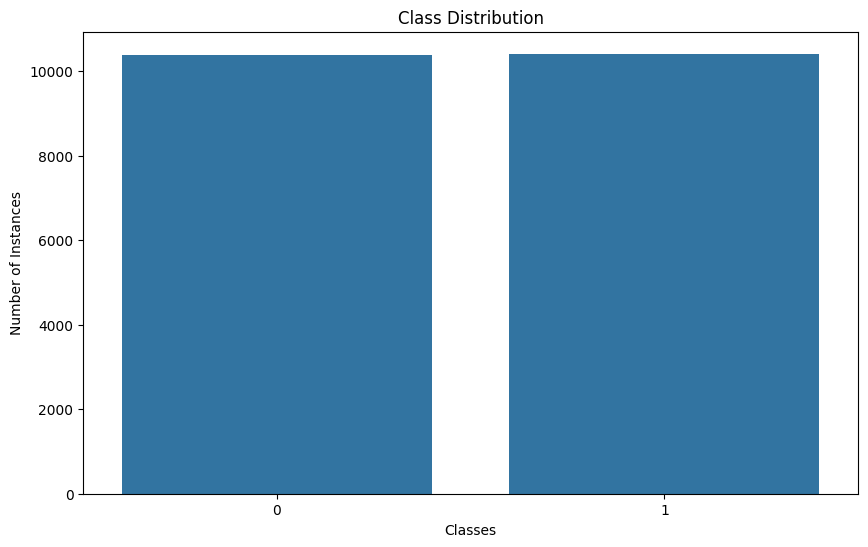

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check the distribution of the target variable (replace 'label' with your actual label column name)
class_counts = news_dataset['label'].value_counts()

print("Class distribution:\n", class_counts)

# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.show()


In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Recall: 0.97
F1 Score: 0.97


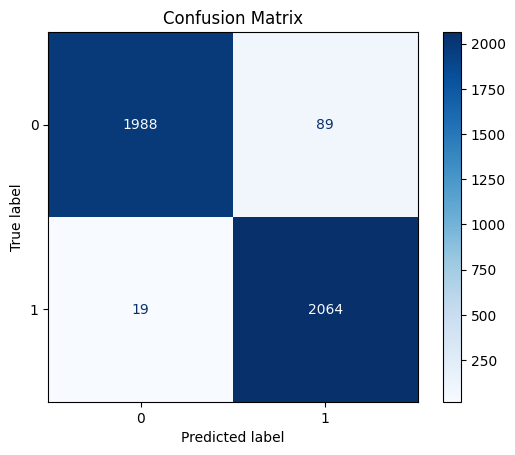

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Making a Predictive System

In [ ]:

model.fit(X_train, Y_train) # Fit the model to your training data

X_new ="Major Tech Firm Under Fire for Alleged Data Breach Affecting Millions of Users Worldwide"

# convert text to feature vectors
X_new = vectorizer.transform([X_new])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake
